Import Libraries

In [84]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [52]:
df=pd.read_csv("loan_approval_dataset.csv")
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [3]:
df.dtypes

loan_id                       int64
 no_of_dependents             int64
 education                   object
 self_employed               object
 income_annum                 int64
 loan_amount                  int64
 loan_term                    int64
 cibil_score                  int64
 residential_assets_value     int64
 commercial_assets_value      int64
 luxury_assets_value          int64
 bank_asset_value             int64
 loan_status                 object
dtype: object

In [4]:
print(df.shape)
print(df.info())

(4269, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None

In [5]:
df.isna().sum().sum()

0

In [6]:
df.duplicated().sum()

0

In [53]:
df=df.drop("loan_id",axis=1)

In [8]:
df.describe()

,no_of_dependents,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
count,4269.000000,4.269000e+03,4.269000e+03,4269.000000,4269.000000,4.269000e+03,4.269000e+03,4.269000e+03,4.269000e+03
mean,2.498712,5.059124e+06,1.513345e+07,10.900445,599.936051,7.472617e+06,4.973155e+06,1.512631e+07,4.976692e+06
std,1.695910,2.806840e+06,9.043363e+06,5.709187,172.430401,6.503637e+06,4.388966e+06,9.103754e+06,3.250185e+06
min,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00
25%,1.000000,2.700000e+06,7.700000e+06,6.000000,453.000000,2.200000e+06,1.300000e+06,7.500000e+06,2.300000e+06
50%,3.000000,5.100000e+06,1.450000e+07,10.000000,600.000000,5.600000e+06,3.700000e+06,1.460000e+07,4.600000e+06
75%,4.000000,7.500000e+06,2.150000e+07,16.000000,748.000000,1.130000e+07,7.600000e+06,2.170000e+07,7.100000e+06
max,5.000000,9.900000e+06,3.950000e+07,20.000000,900.000000,2.910000e+07,1.940000e+07,3.920000e+07,1.470000e+07


In [9]:
df.describe(include="object")

,education,self_employed,loan_status
count,4269,4269,4269
unique,2,2,2
top,Graduate,Yes,Approved
freq,2144,2150,2656


In [10]:
df.columns

Index([' no_of_dependents', ' education', ' self_employed', ' income_annum',
       ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')

In [54]:
df.columns = df.columns.str.strip()
df.columns

Index(['no_of_dependents', 'education', 'self_employed', 'income_annum',
       'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value',
       'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value',
       'loan_status'],
      dtype='object')

In [12]:
for col in df.select_dtypes(include=["object"]).columns:
    print(df[col].value_counts())
    print('----------------------------')

education
 Graduate        2144
 Not Graduate    2125
Name: count, dtype: int64
----------------------------
self_employed
 Yes    2150
 No     2119
Name: count, dtype: int64
----------------------------
loan_status
 Approved    2656
 Rejected    1613
Name: count, dtype: int64
----------------------------


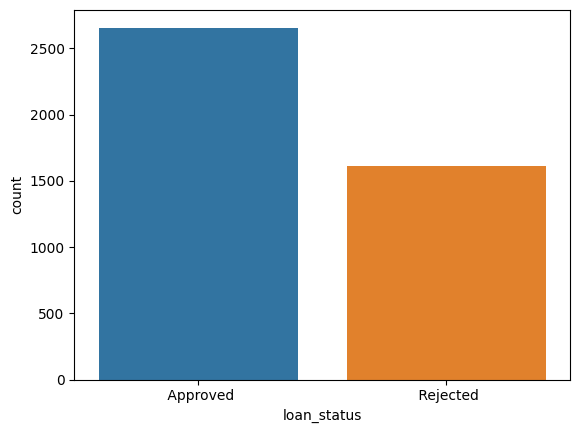

In [13]:
# imbalance target
sns.countplot(data=df,x="loan_status")
plt.show()

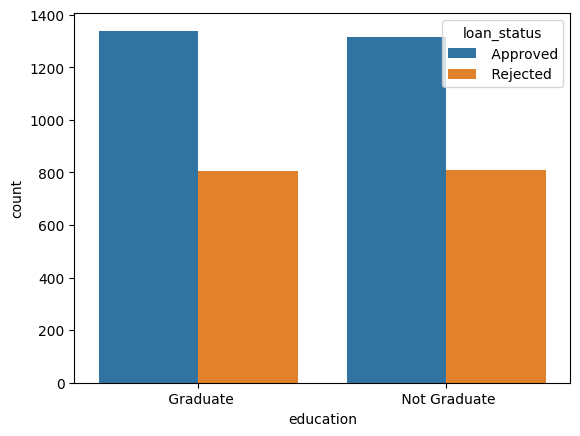

In [14]:
sns.countplot(data=df,x="education",hue='loan_status')
plt.show()

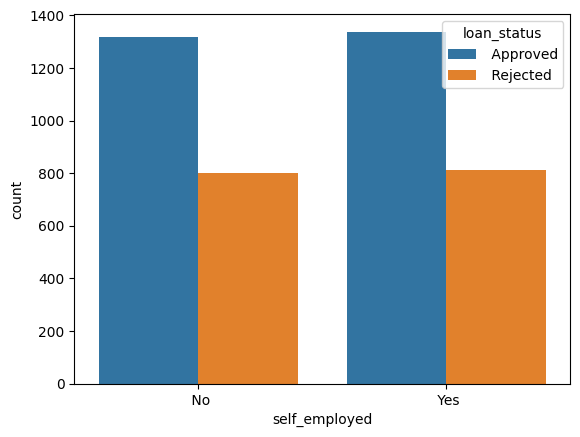

In [15]:
sns.countplot(data=df,x="self_employed",hue='loan_status')
plt.show()

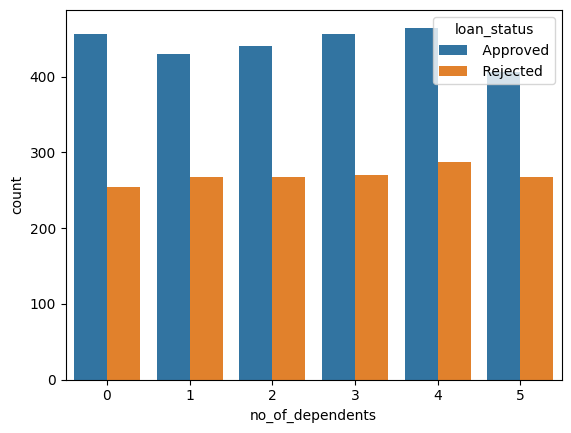

In [19]:
sns.countplot(data=df,x="no_of_dependents",hue='loan_status')
plt.show()

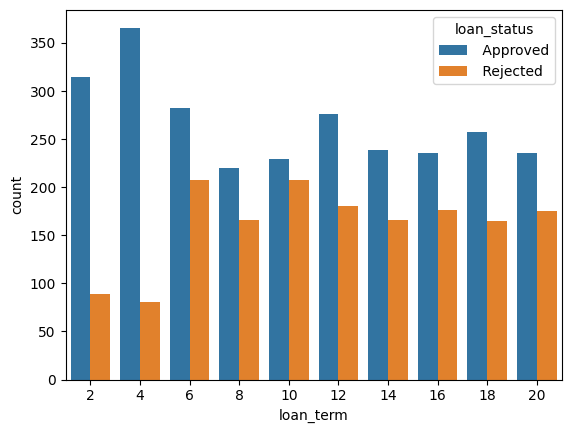

In [20]:
sns.countplot(data=df,x="loan_term",hue='loan_status')
plt.show()

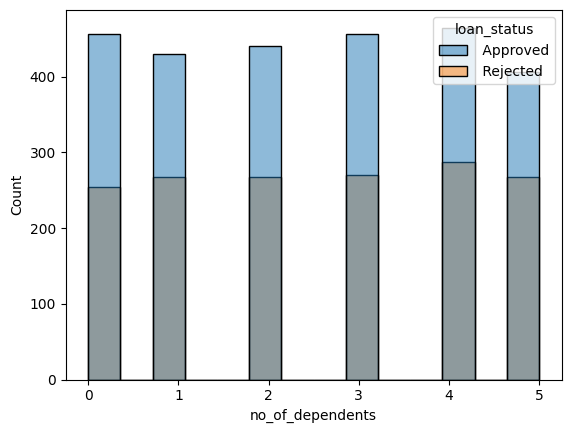

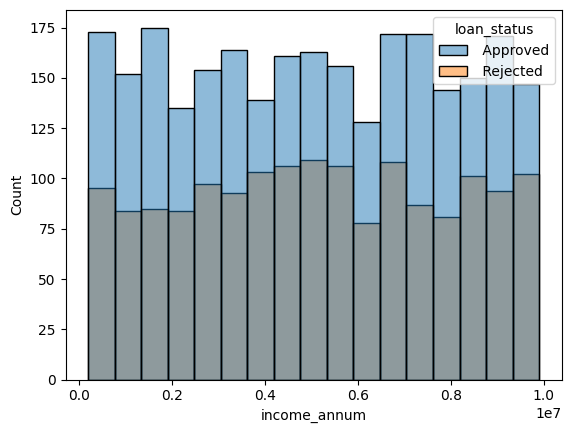

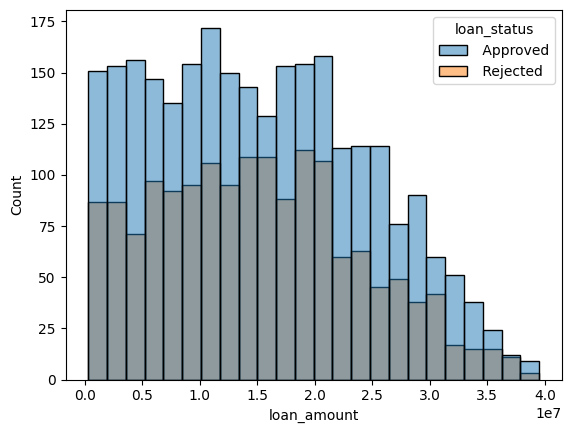

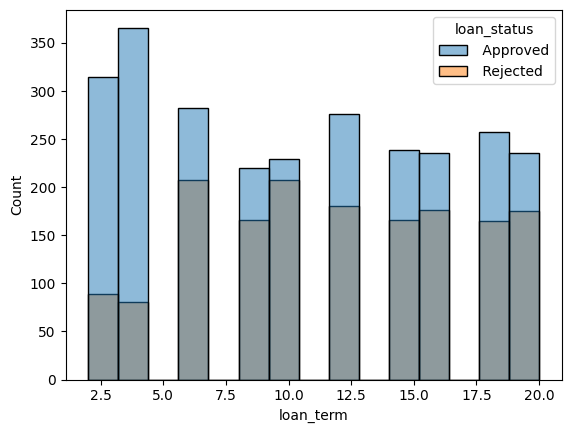

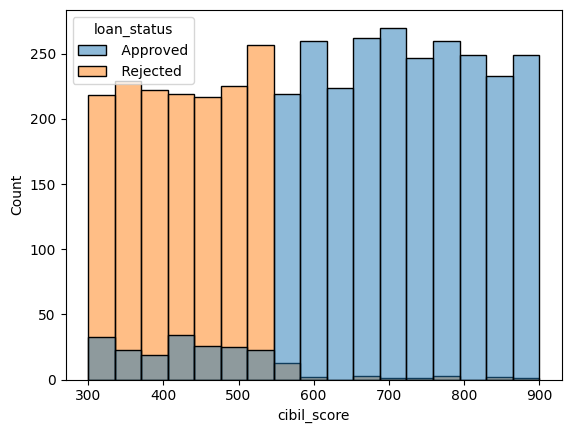

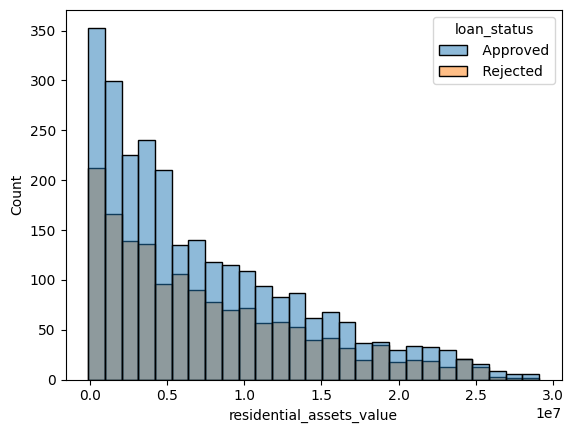

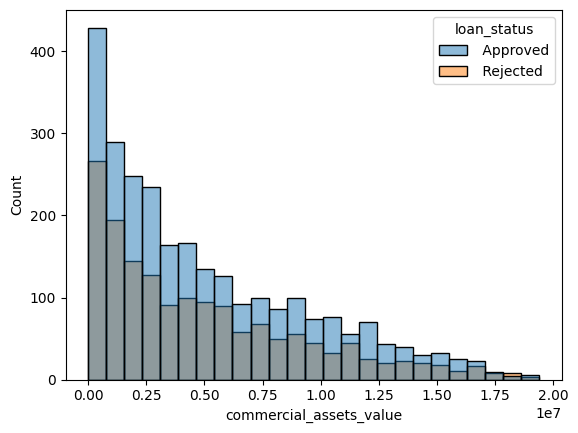

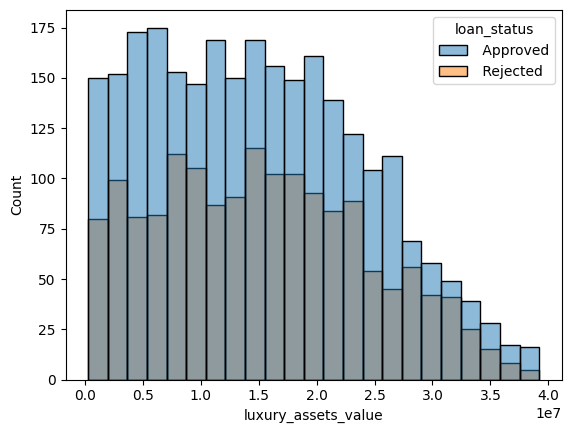

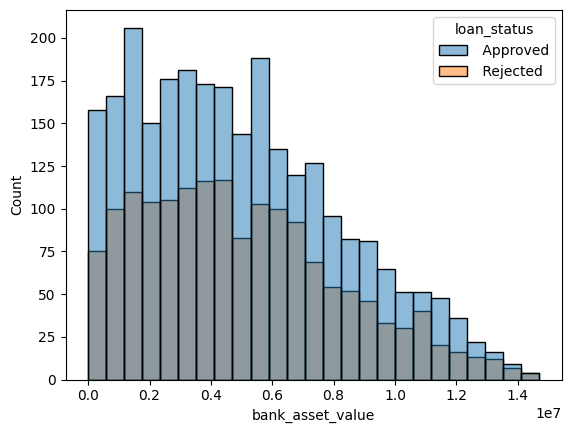

In [16]:
for col in df.select_dtypes(include=[np.number]).columns:
    sns.histplot(x=col,data=df,hue="loan_status")
    plt.show()

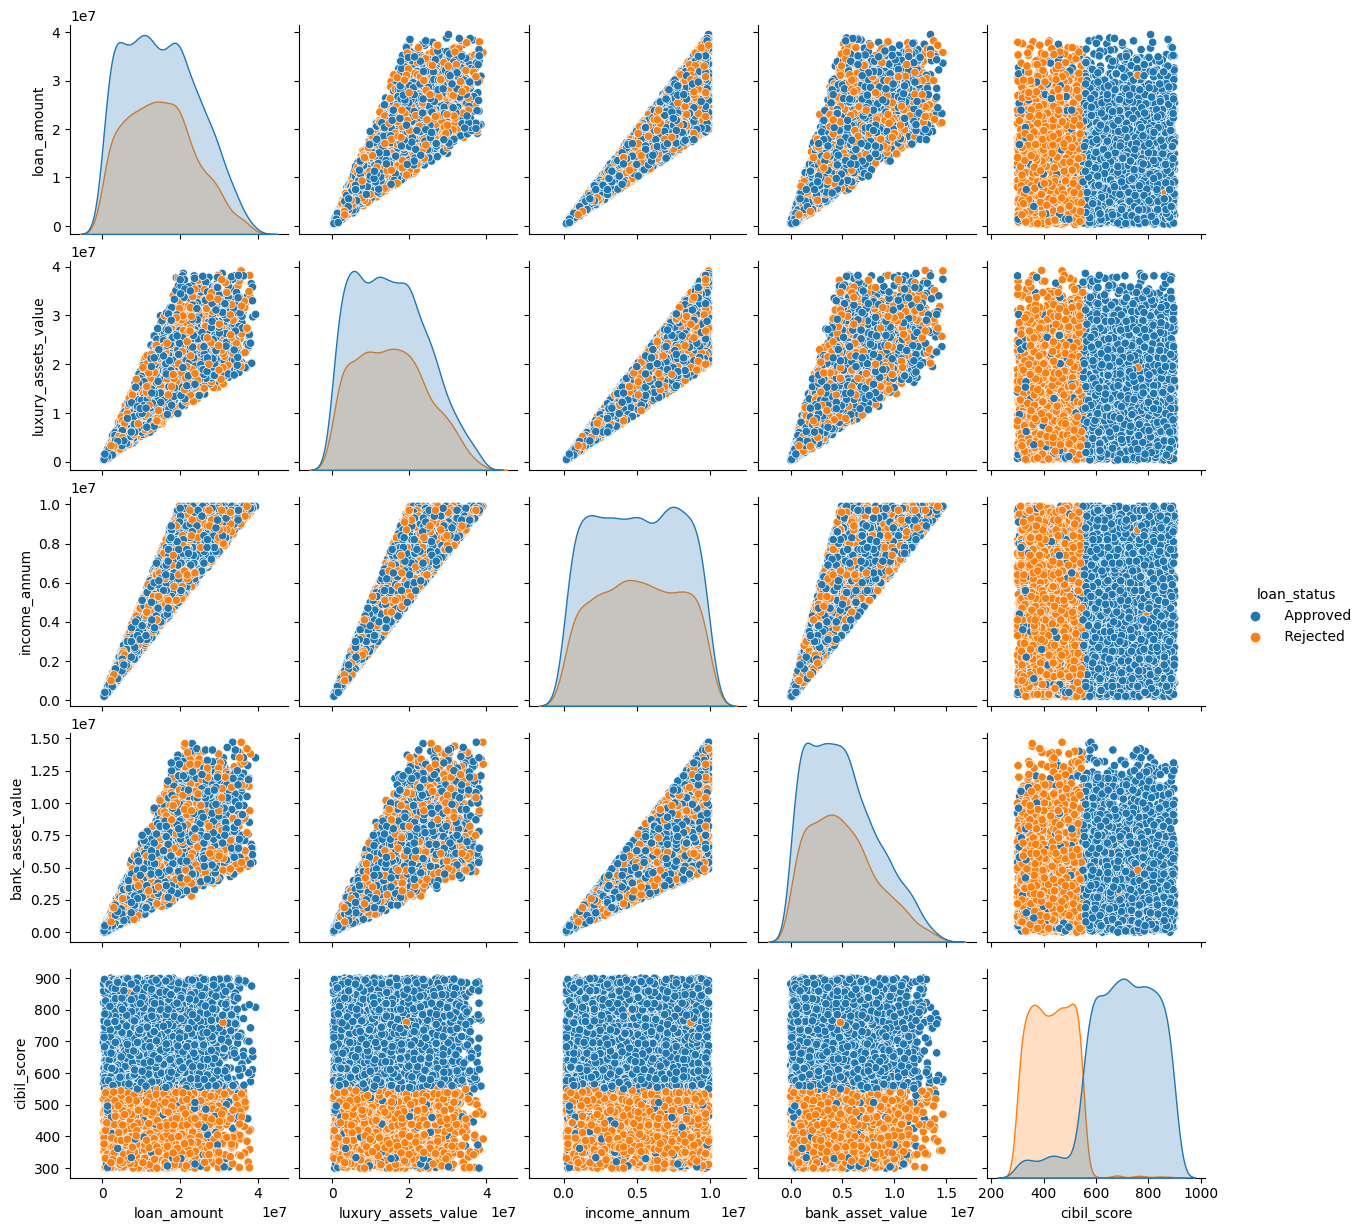

In [17]:
sns.pairplot(df, vars=["loan_amount", "luxury_assets_value","income_annum", "bank_asset_value", "cibil_score"],
            hue="loan_status")
plt.show()

In [18]:
loan_mean = df["loan_amount"].mean()
print(str(round((loan_mean/1000000),2))+" million")

15.13 million


In [48]:
le=LabelEncoder()

In [55]:
for col in df.select_dtypes(include=["object"]).columns:
    df[col]=le.fit_transform(df[col])

In [56]:
df

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,2,0,0,9600000,29900000,12,778,2400000,17600000,22700000,8000000,0
1,0,1,1,4100000,12200000,8,417,2700000,2200000,8800000,3300000,1
2,3,0,0,9100000,29700000,20,506,7100000,4500000,33300000,12800000,1
3,3,0,0,8200000,30700000,8,467,18200000,3300000,23300000,7900000,1
4,5,1,1,9800000,24200000,20,382,12400000,8200000,29400000,5000000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4264,5,0,1,1000000,2300000,12,317,2800000,500000,3300000,800000,1
4265,0,1,1,3300000,11300000,20,559,4200000,2900000,11000000,1900000,0
4266,2,1,0,6500000,23900000,18,457,1200000,12400000,18100000,7300000,1
4267,1,1,0,4100000,12800000,8,780,8200000,700000,14100000,5800000,0


In [68]:
X=df.drop("loan_status",axis=1)
y=df["loan_status"]

In [69]:
Stdscaler=StandardScaler()

In [70]:
X_scaled=Stdscaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value
0,-0.294102,-0.995559,-1.007288,1.617979,1.633052,0.192617,1.032792,-0.780058,2.877289,0.832028,0.930304
1,-1.473548,1.004461,0.992765,-0.341750,-0.324414,-0.508091,-1.061051,-0.733924,-0.631921,-0.694993,-0.515936
2,0.295621,-0.995559,-1.007288,1.439822,1.610933,1.594031,-0.544840,-0.057300,-0.107818,1.996520,2.407316
3,0.295621,-0.995559,-1.007288,1.119139,1.721525,-0.508091,-0.771045,1.649637,-0.381263,0.897943,0.899533
4,1.475067,1.004461,0.992765,1.689242,1.002681,1.594031,-1.264055,0.757724,0.735304,1.568075,0.007172
...,...,...,...,...,...,...,...,...,...,...,...
4264,1.475067,-0.995559,0.992765,-1.446324,-1.419268,0.192617,-1.641063,-0.718546,-1.019301,-1.299210,-1.285213
4265,-1.473548,1.004461,0.992765,-0.626801,-0.423946,1.594031,-0.237434,-0.503257,-0.472412,-0.453306,-0.946732
4266,-0.294102,1.004461,-1.007288,0.513405,0.969504,1.243677,-0.829046,-0.964591,1.692361,0.326683,0.714907
4267,-0.883825,1.004461,-1.007288,-0.341750,-0.258059,-0.508091,1.044393,0.111856,-0.973727,-0.112748,0.253341


In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=42, test_size=0.2, stratify=y)

<h1>Using Decison Tree</h1>

In [75]:
dt= DecisionTreeClassifier(max_depth=2, random_state=42)
dt.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2, random_state=42)

In [118]:
y_pred = dt.predict(X_test)
dt_acc=accuracy_score(y_test, y_pred)
print(dt_acc)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9613583138173302
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       531
           1       1.00      0.90      0.95       323

    accuracy                           0.96       854
   macro avg       0.97      0.95      0.96       854
weighted avg       0.96      0.96      0.96       854

[[531   0]
 [ 33 290]]


<h1>Using Decision Tree with gini Impurity</h1>

In [134]:
dtg= DecisionTreeClassifier(criterion='gini', random_state=42)
dtg.fit(X_train,y_train)

DecisionTreeClassifier(random_state=42)

In [135]:
y_pred = dtg.predict(X_test)
dt_gini_acc=accuracy_score(y_test, y_pred)
print(dt_gini_acc)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

0.9718969555035128
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       531
           1       0.97      0.95      0.96       323

    accuracy                           0.97       854
   macro avg       0.97      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

[[523   8]
 [ 16 307]]


<h1>Using Random Forest</h1>

In [82]:
rf = RandomForestClassifier(n_estimators=400, min_samples_leaf=0.12, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(min_samples_leaf=0.12, n_estimators=400, random_state=42)

In [120]:
y_pred_rf = rf.predict(X_test)
rf_acc=accuracy_score(y_test, y_pred_rf)
print(rf_acc)
print(classification_report(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

0.968384074941452
              precision    recall  f1-score   support

           0       0.99      0.95      0.97       531
           1       0.93      0.99      0.96       323

    accuracy                           0.97       854
   macro avg       0.96      0.97      0.97       854
weighted avg       0.97      0.97      0.97       854

[[507  24]
 [  3 320]]


<h1>How to choose n_neighbors</h1>

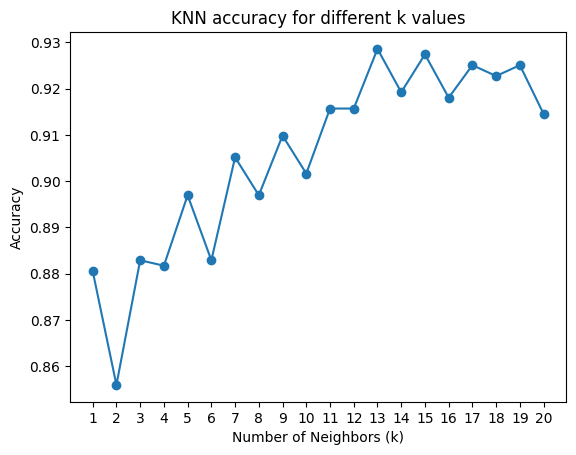

In [104]:
k_range = range(1, 21)  # test k = 1 to 20
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs k
plt.plot(k_range, scores, marker='o')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("KNN accuracy for different k values")
plt.xticks(k_range)  # set x-axis ticks to 1,2,3,...,20
plt.show()

<h1>Using KNN</h1>

In [105]:
#we choose n_neighbors=13
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=13)

In [121]:
y_pred_knn = knn.predict(X_test)
knn_acc=accuracy_score(y_test, y_pred_knn)
print(knn_acc)
print(classification_report(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))


0.9285714285714286
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       531
           1       0.92      0.89      0.90       323

    accuracy                           0.93       854
   macro avg       0.93      0.92      0.92       854
weighted avg       0.93      0.93      0.93       854

[[506  25]
 [ 36 287]]


<h1>Using Logistic Regression</h1>

In [108]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)



LogisticRegression()

In [122]:
y_pred_logreg = logreg.predict(X_test)
log_acc=accuracy_score(y_test, y_pred_logreg)
print(log_acc)
print(classification_report(y_test, y_pred_logreg))
print(confusion_matrix(y_test, y_pred_logreg))

0.9227166276346604
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       531
           1       0.92      0.88      0.90       323

    accuracy                           0.92       854
   macro avg       0.92      0.91      0.92       854
weighted avg       0.92      0.92      0.92       854

[[505  26]
 [ 40 283]]


<h1>Comparison between Models</h1>

[0.9613583138173302, 0.9718969555035128, 0.968384074941452, 0.9285714285714286, 0.9227166276346604]


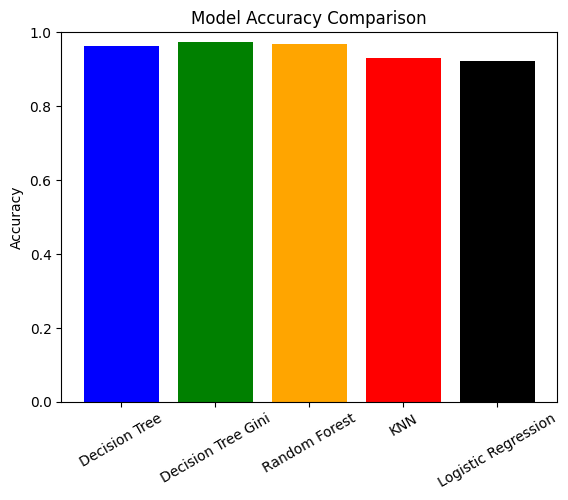

In [131]:
models = ['Decision Tree', 'Decision Tree Gini','Random Forest','KNN', 'Logistic Regression']
accuracies = [dt_acc, dt_gini_acc, rf_acc,knn_acc,log_acc]
print(accuracies)
plt.bar(models, accuracies, color=['blue','green','orange','red','black'])
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=30)
plt.ylim(0,1)
plt.show()

<h1>The best model is Decision Tree with Gini impurity</h1>